In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy import integrate
import AnaUtils as au
import Triggered as tr

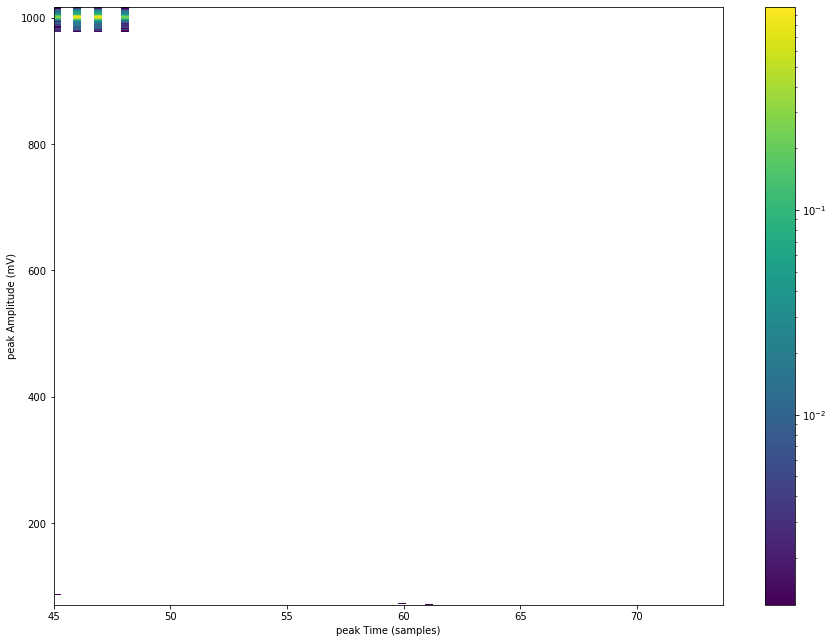

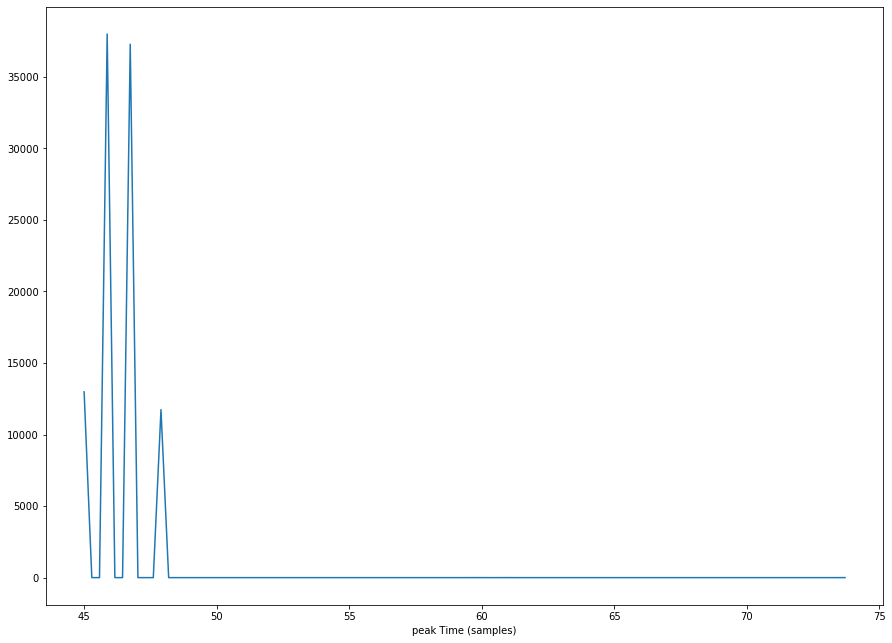

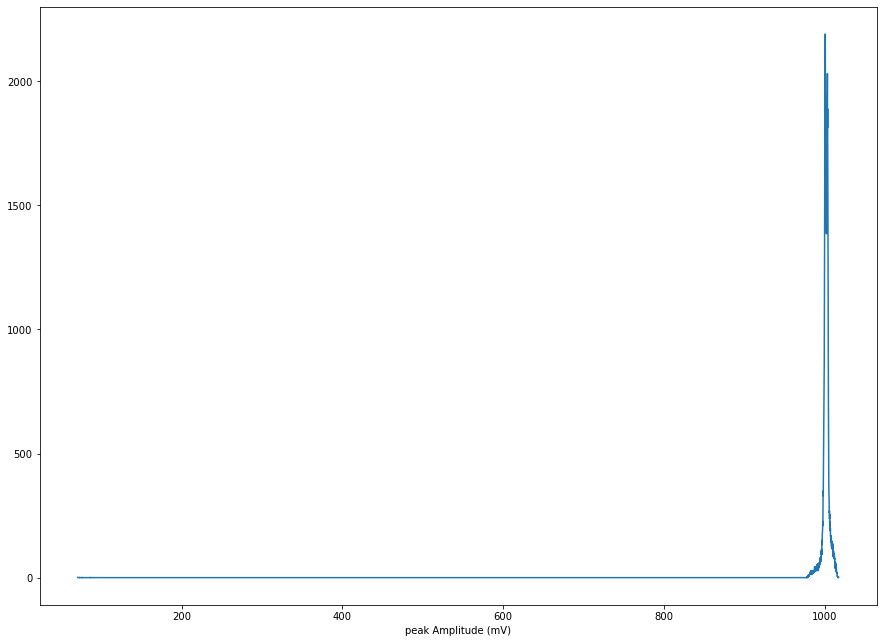

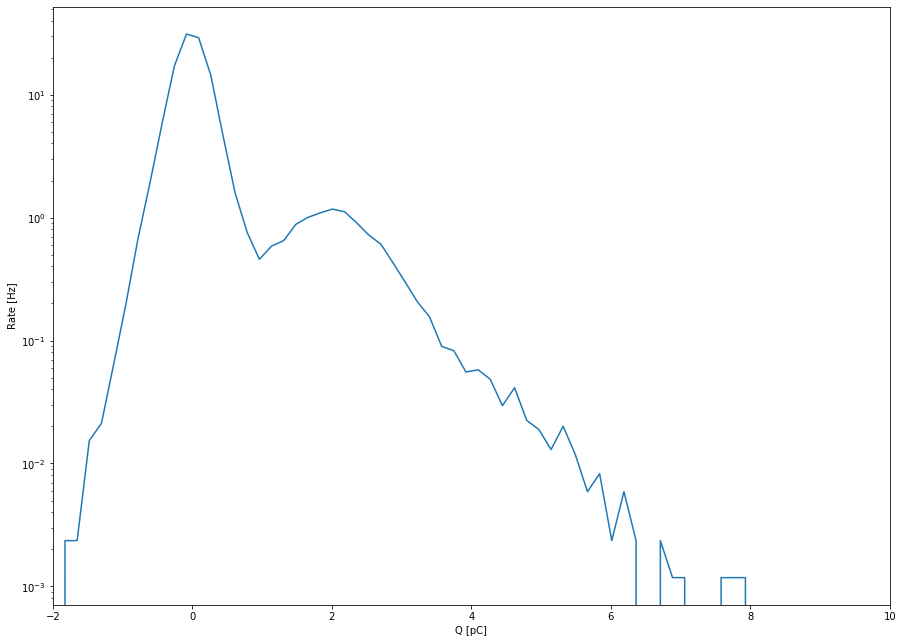

In [21]:
QSPE = tr.extRun('/data/share/SA5446/SPE2_1710V_200617_100_samples_100000_events/0',30,10,20,qbins=500)
plt.plot(QSPE[1],QSPE[0])
plt.yscale('log')
plt.xlim(-2,10)
plt.xlabel('Q [pC]')
plt.ylabel('Rate [Hz]')
plt.savefig("SPE.png")

In [22]:
GFit = tr.fitQ(QSPE,[0,12,1,2,1,1],([-1,2,0,0.5,0,0],[1,15,2.5,3,3,3.5]))
GFit
SPE1710 = GFit[0][4]

In [23]:
wdir = '/data/share/SA5446'
#Gains = [1202,1299,1399,1500,1602,1710,1800,1901]
Gains = [1525, 1550, 1575, 1600, 1625, 1650, 1675, 1700, 1710]
fWaves = ['{}/Gain_{}V_200619_100_samples_20000_events/0'.format(wdir,iG) for iG in Gains]
fWaves

['/data/share/SA5446/Gain_1525V_200619_100_samples_20000_events/0',
 '/data/share/SA5446/Gain_1550V_200619_100_samples_20000_events/0',
 '/data/share/SA5446/Gain_1575V_200619_100_samples_20000_events/0',
 '/data/share/SA5446/Gain_1600V_200619_100_samples_20000_events/0',
 '/data/share/SA5446/Gain_1625V_200619_100_samples_20000_events/0',
 '/data/share/SA5446/Gain_1650V_200619_100_samples_20000_events/0',
 '/data/share/SA5446/Gain_1675V_200619_100_samples_20000_events/0',
 '/data/share/SA5446/Gain_1700V_200619_100_samples_20000_events/0',
 '/data/share/SA5446/Gain_1710V_200619_100_samples_20000_events/0']

In [24]:
nBins = [50,50,50,50,50]
P0 = [[0.5,300,0.5],[0.7,300,1,2.1,1,1],[1.5,300,2,3.2,10,2],[2,200,3,6,10,2],[0,150,0.2,4,250,4,10,10,4]]

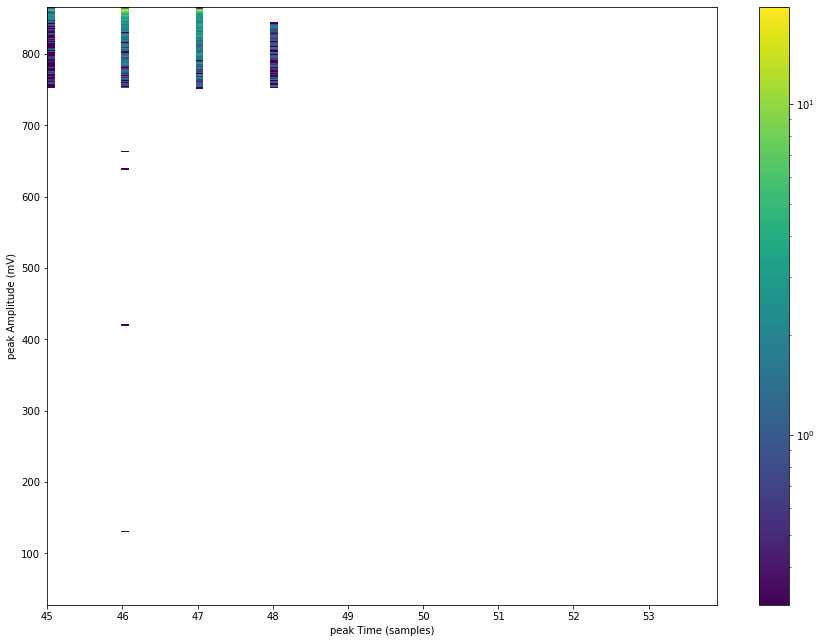

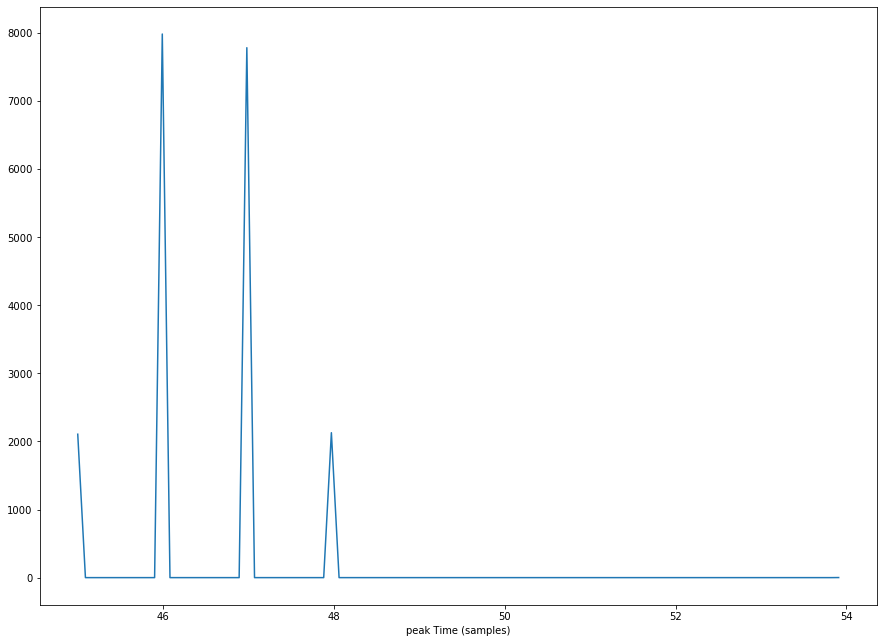

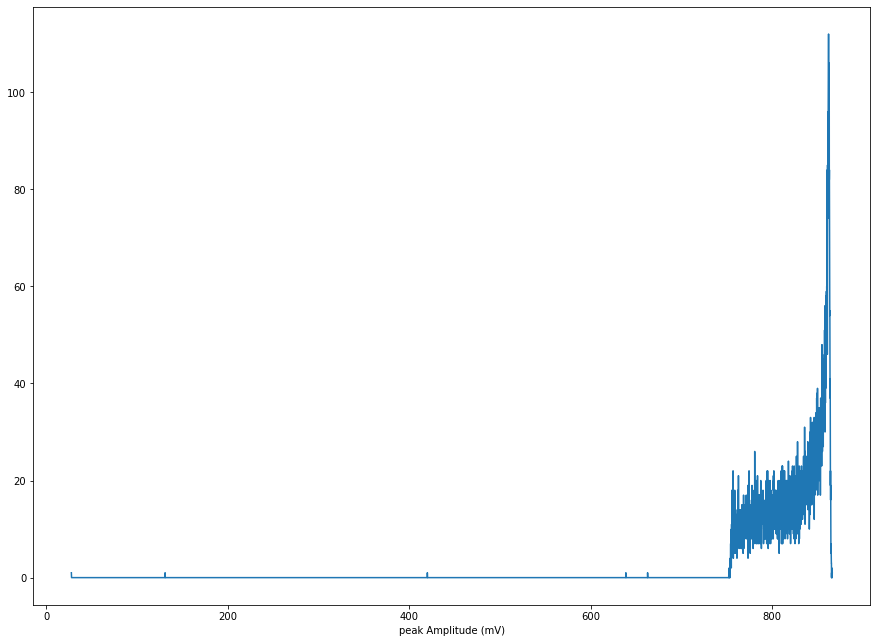

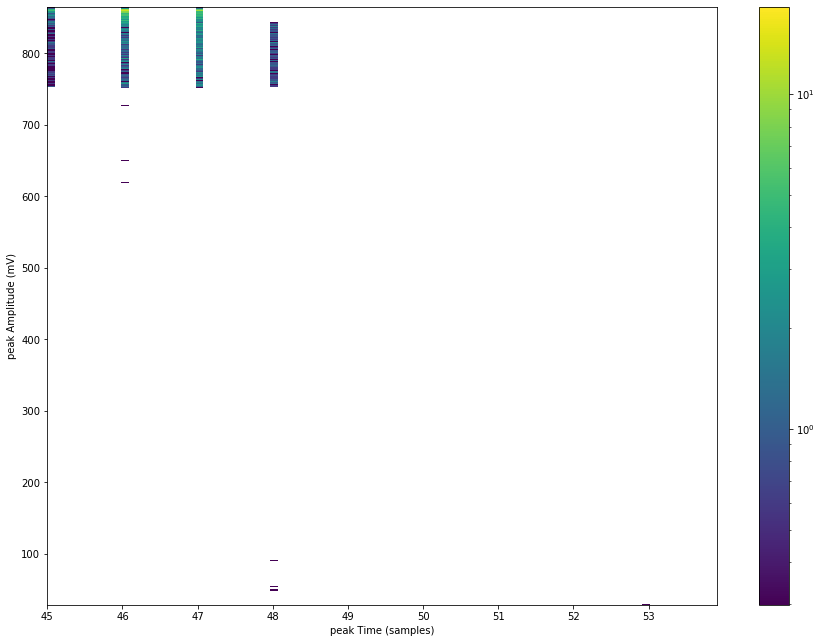

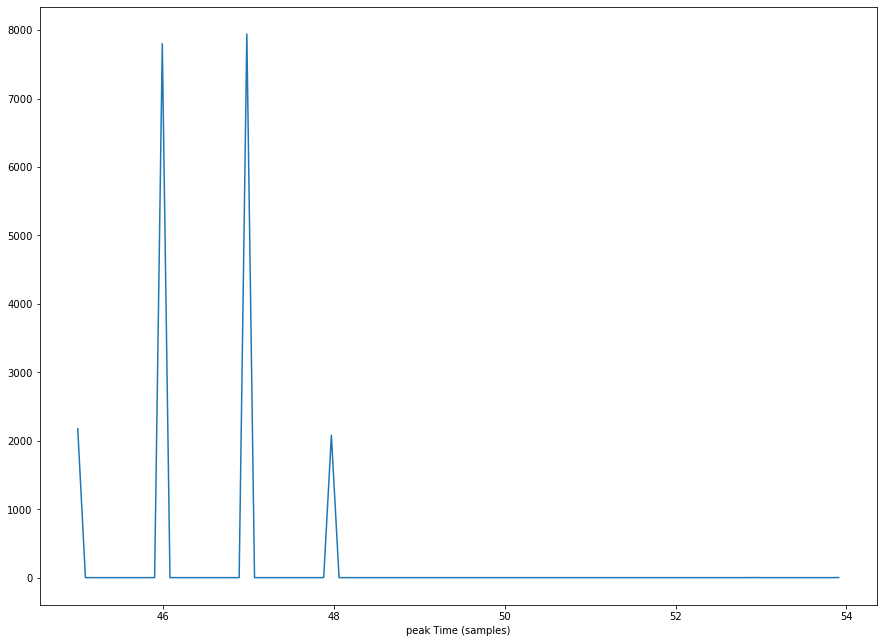

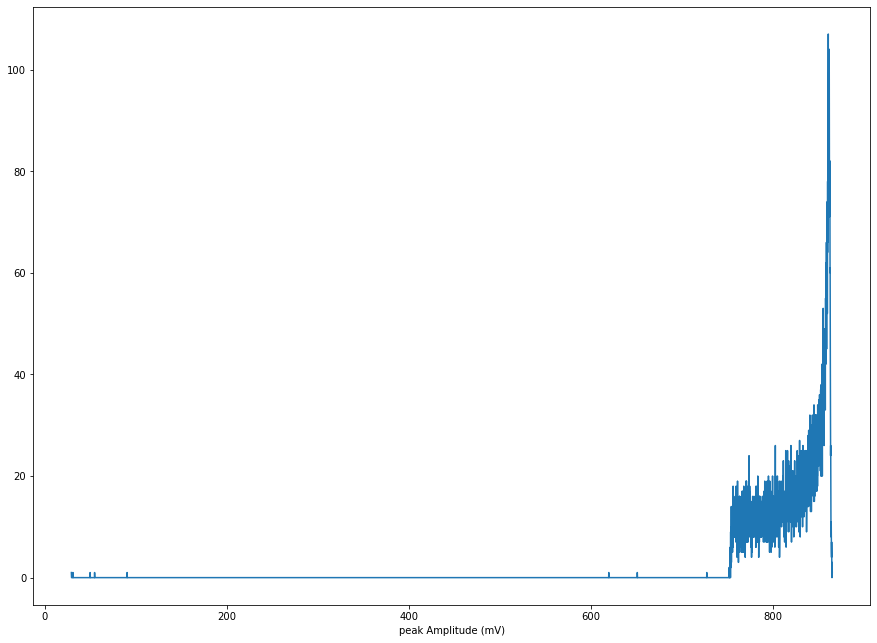

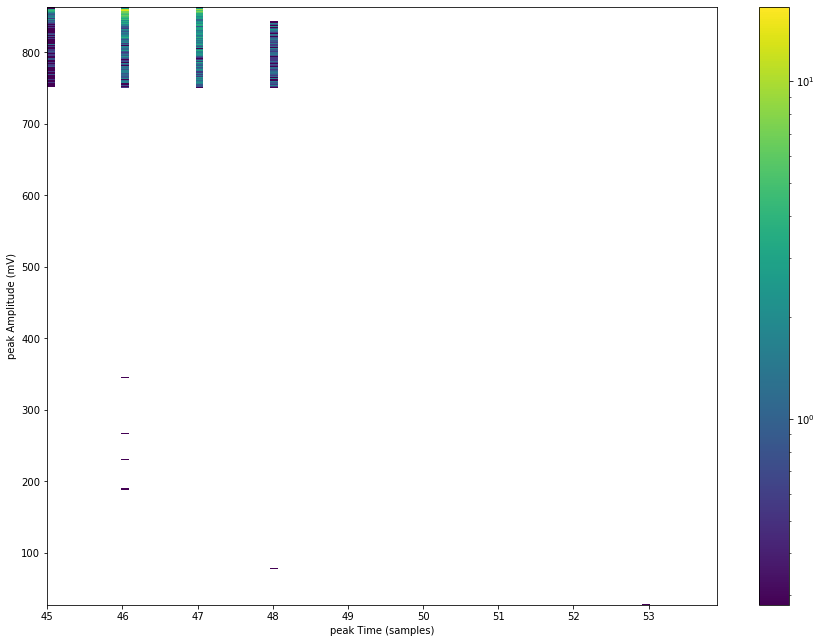

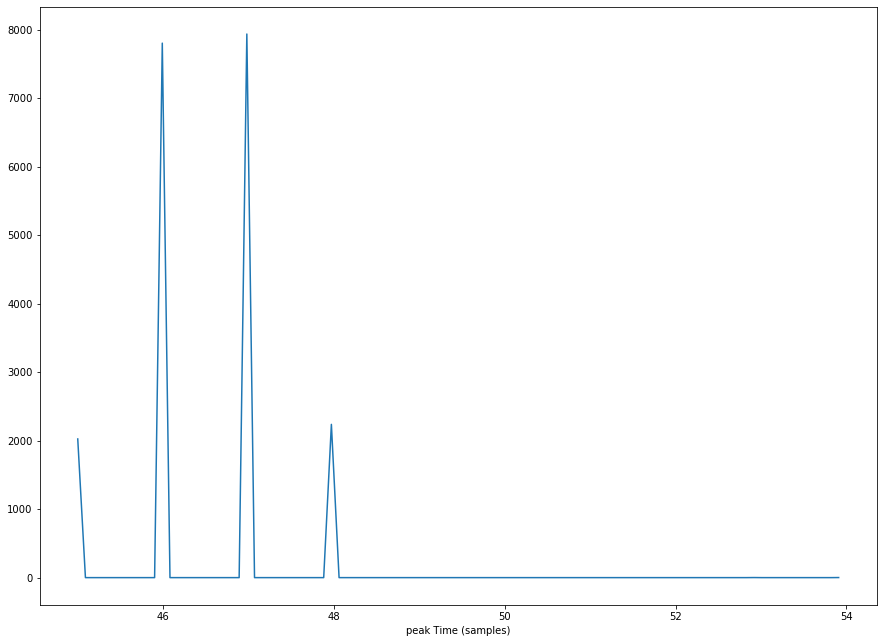

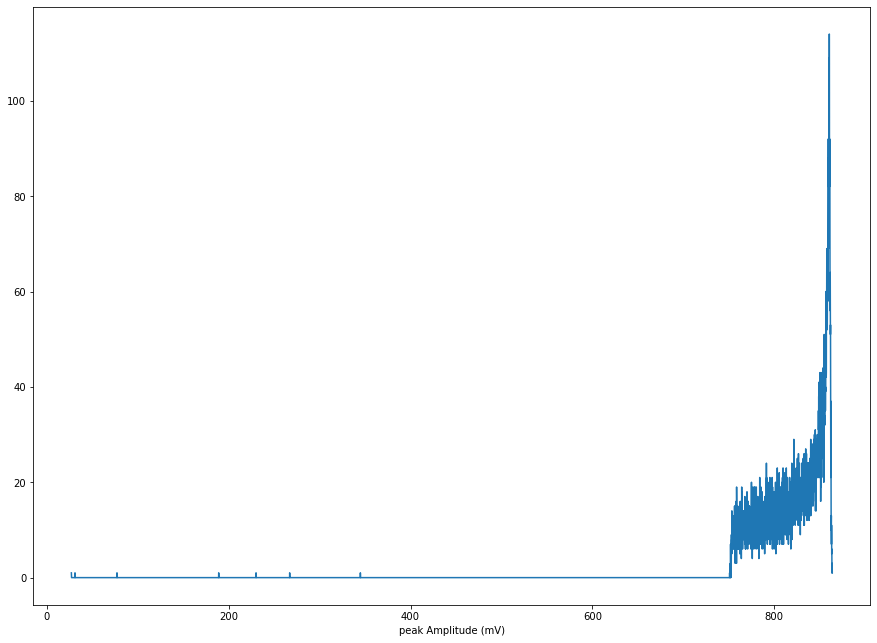

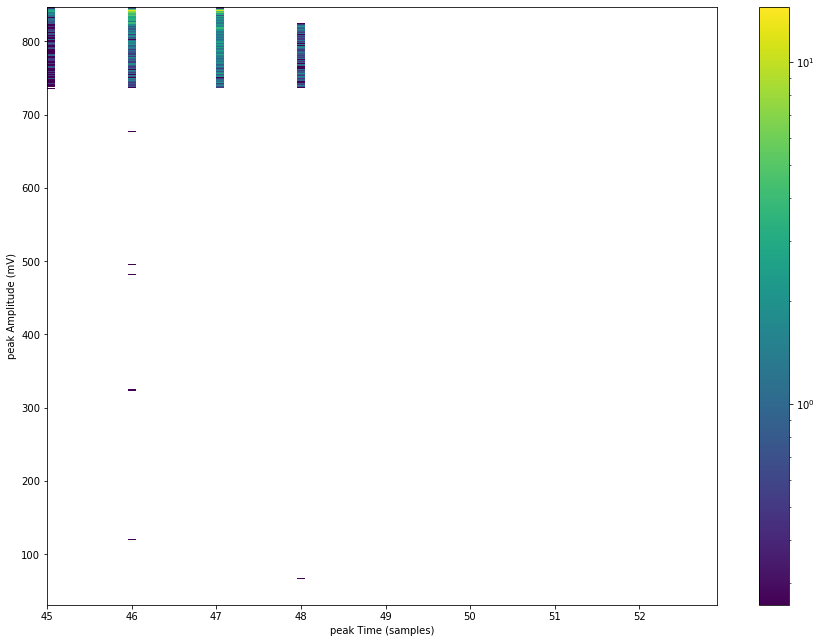

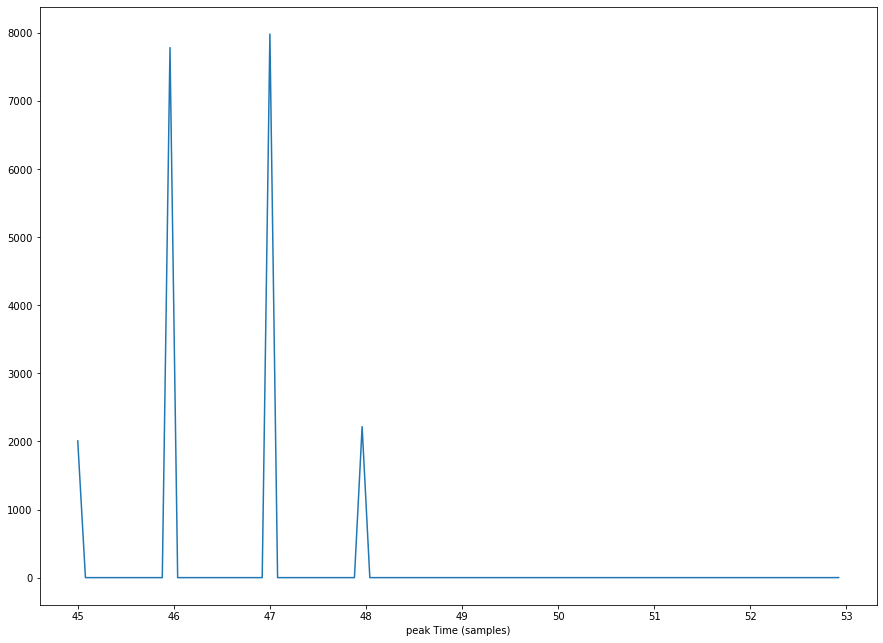

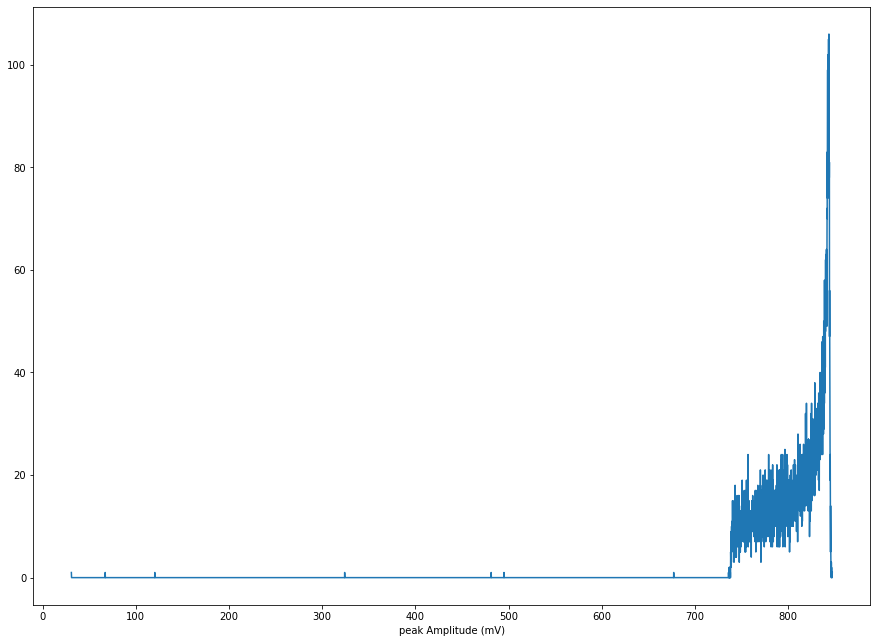

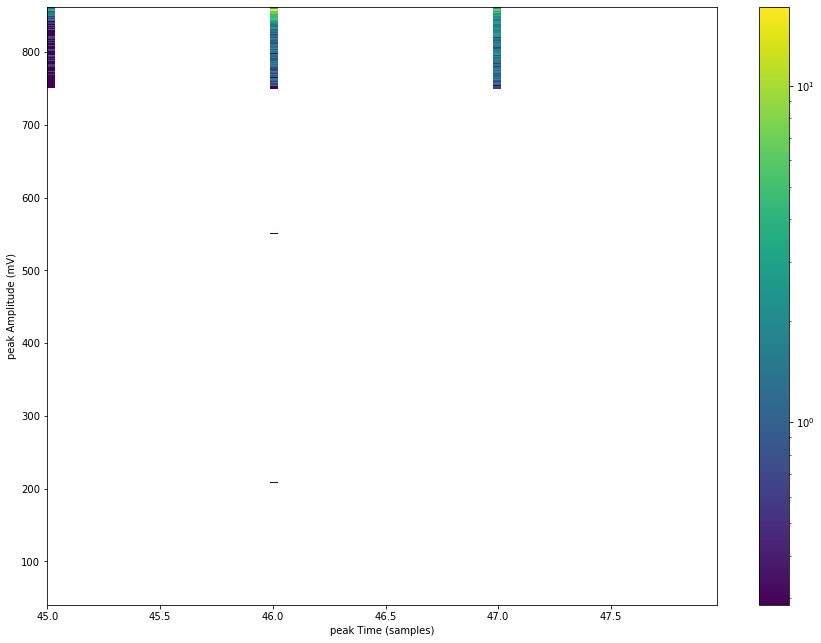

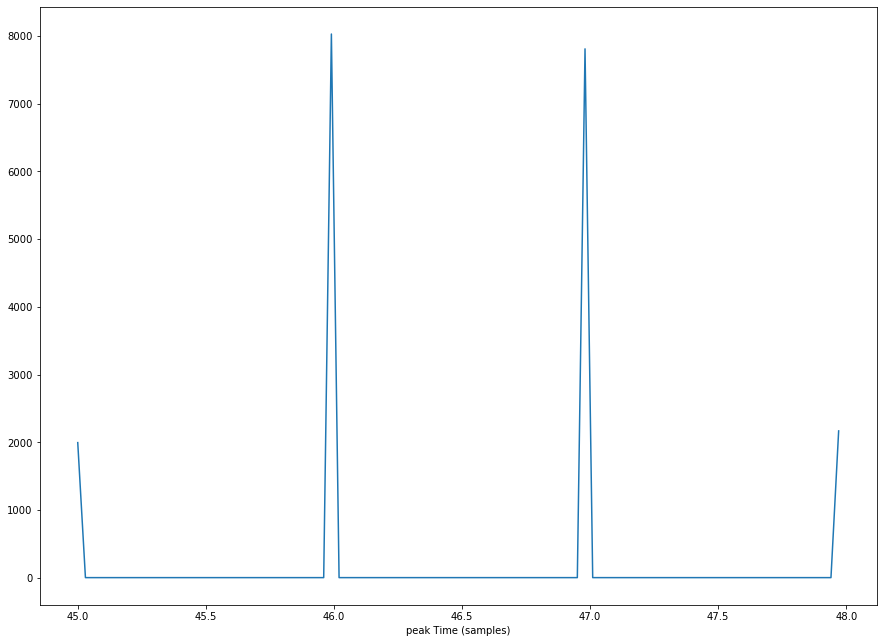

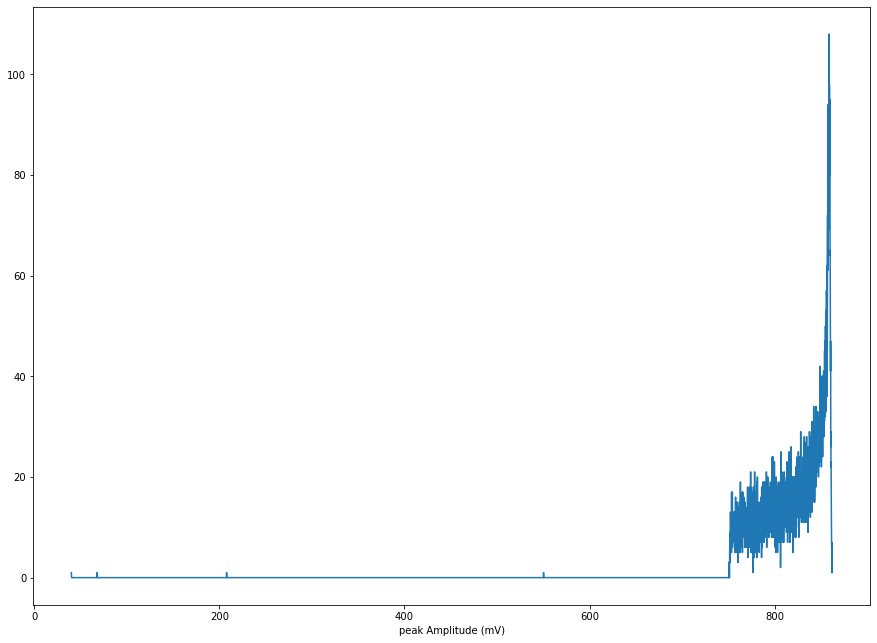

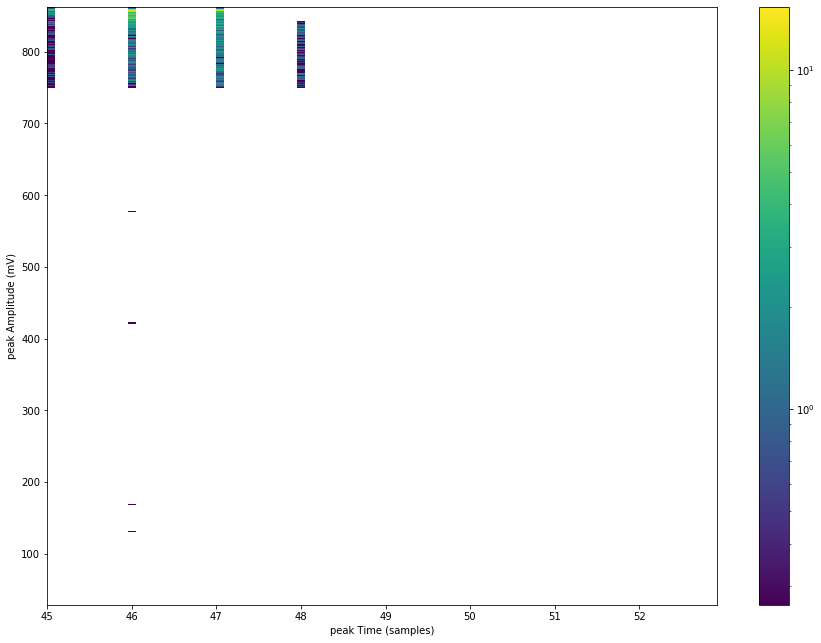

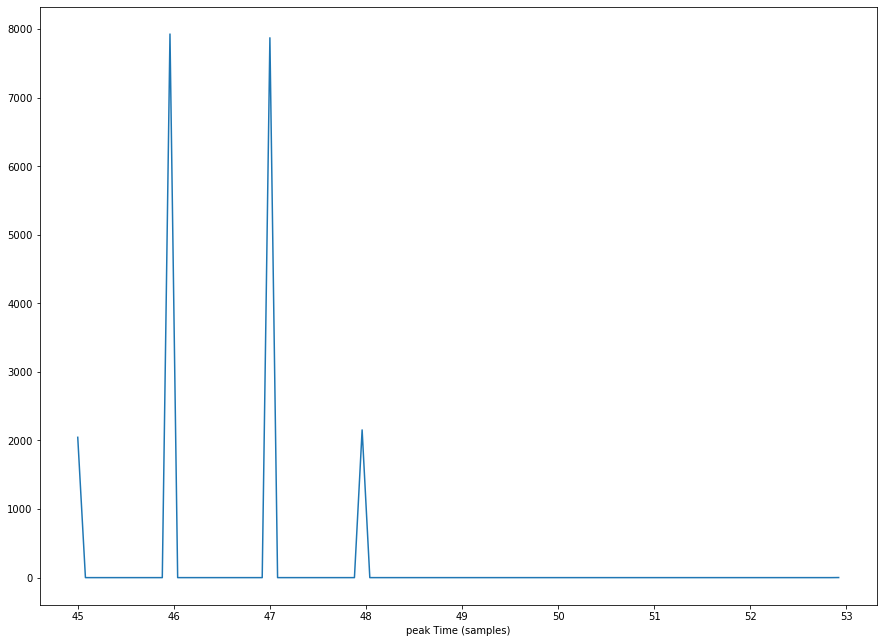

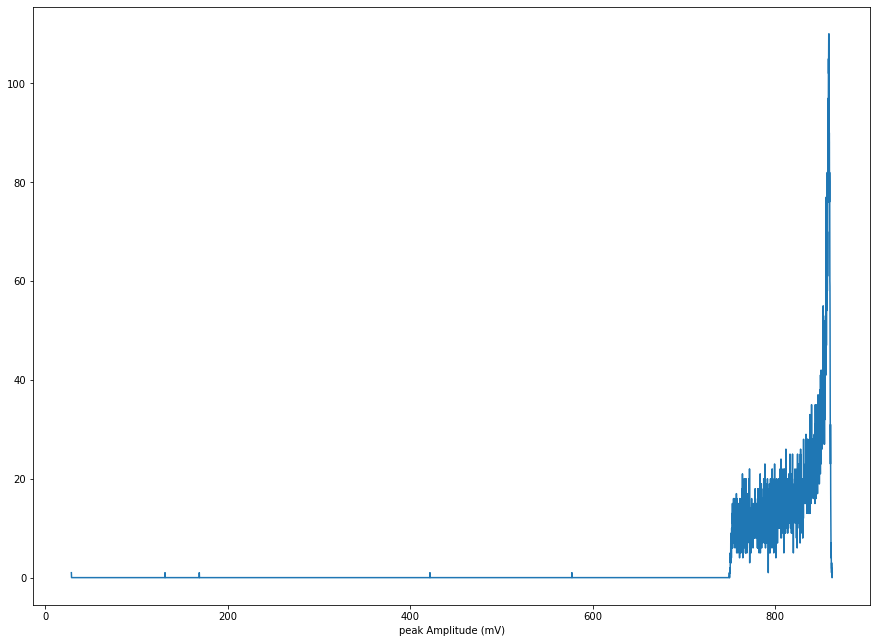

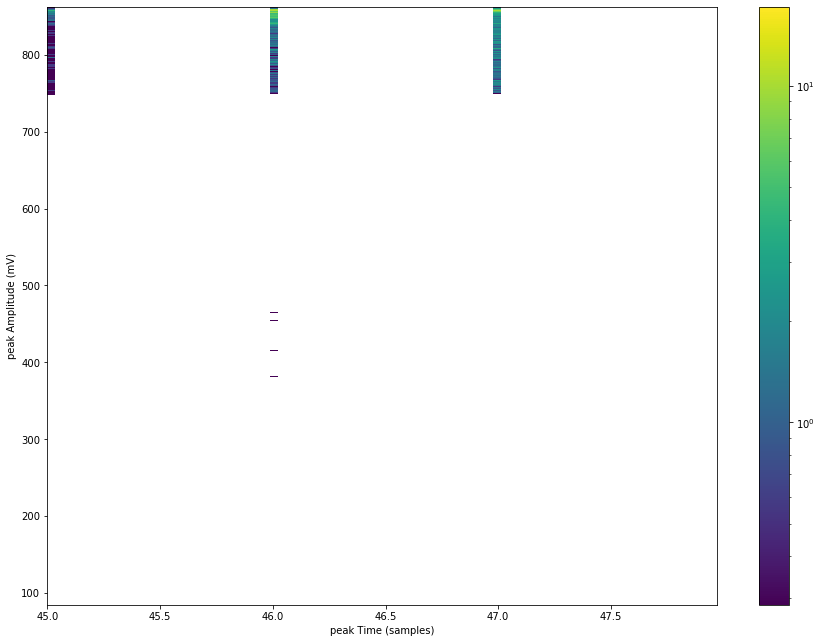

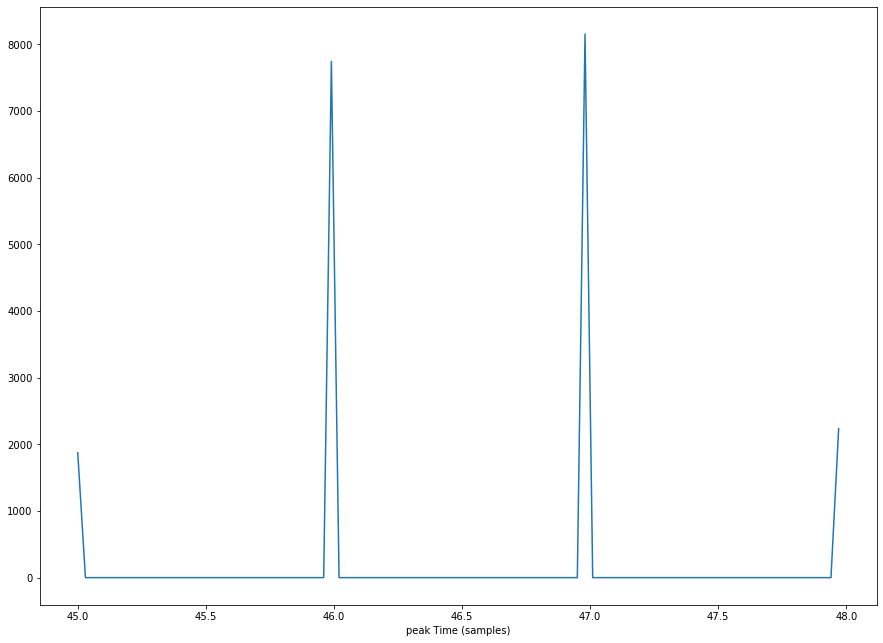

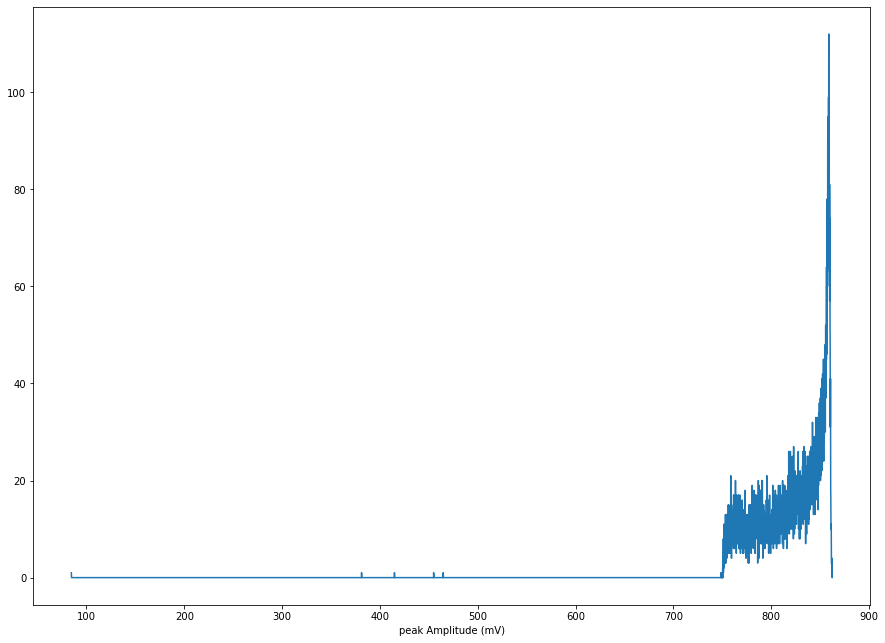

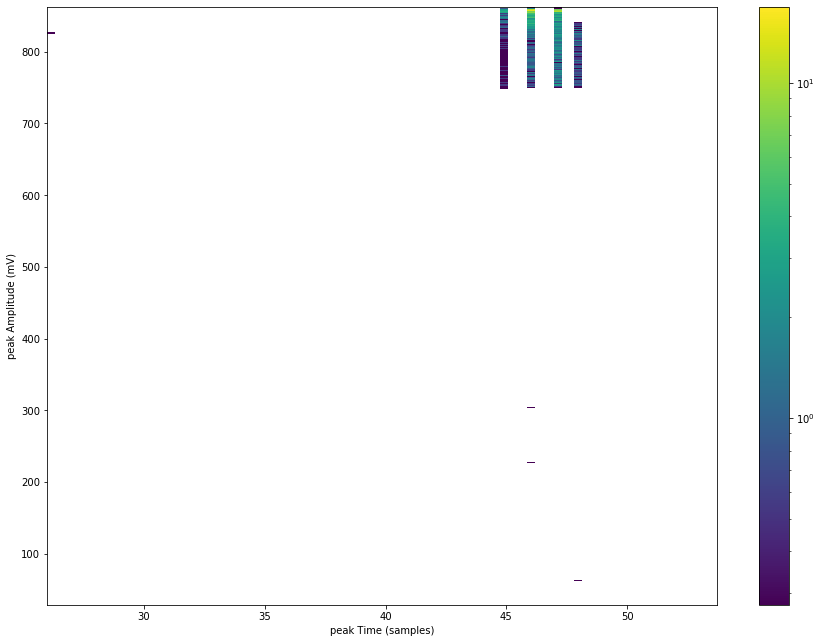

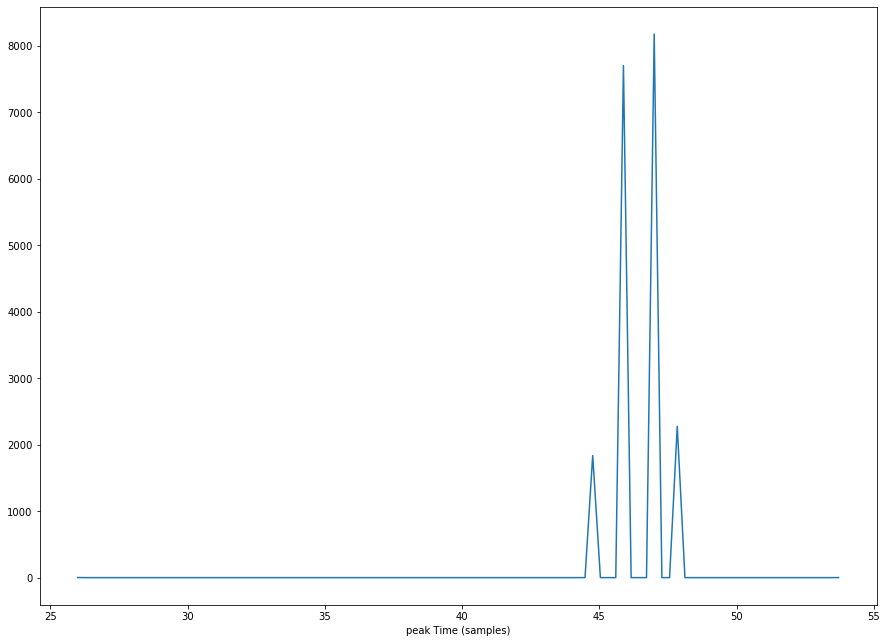

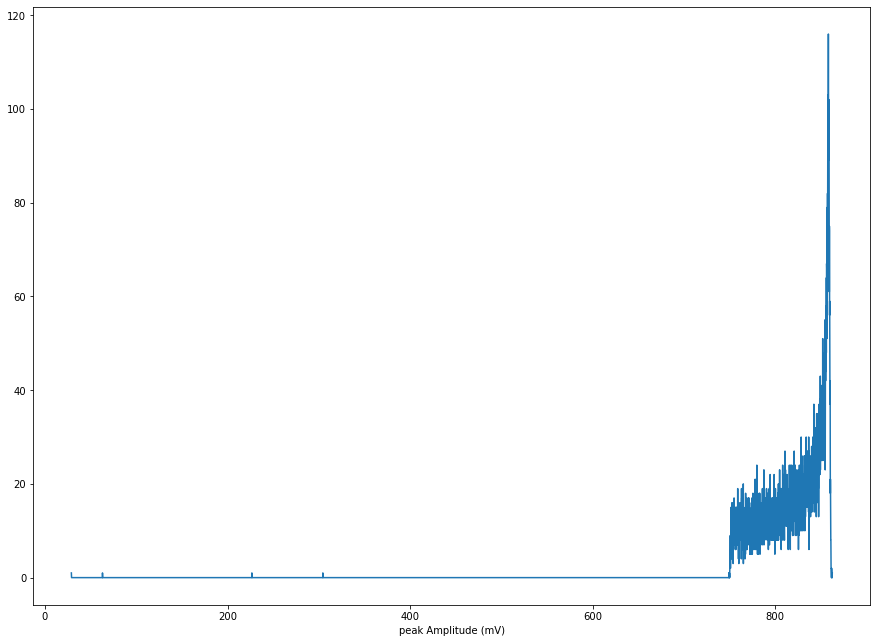

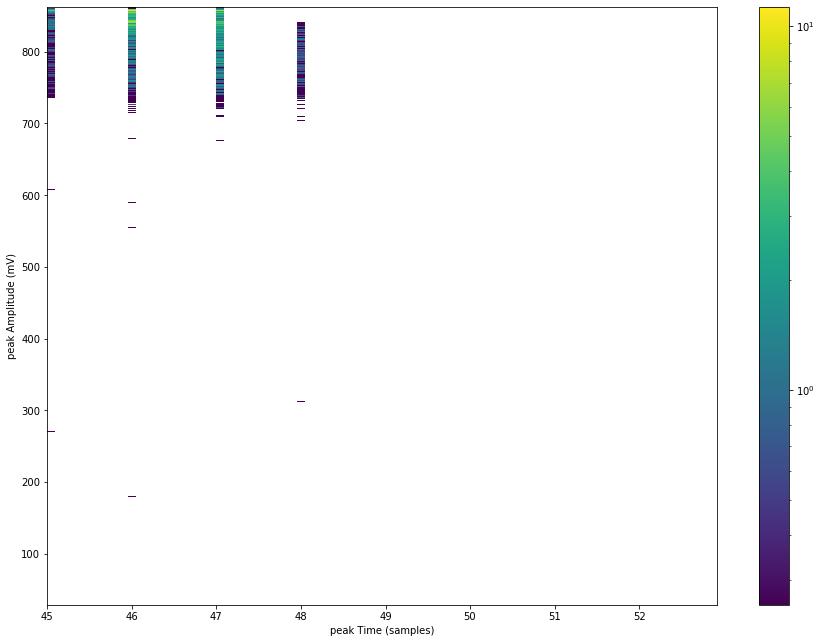

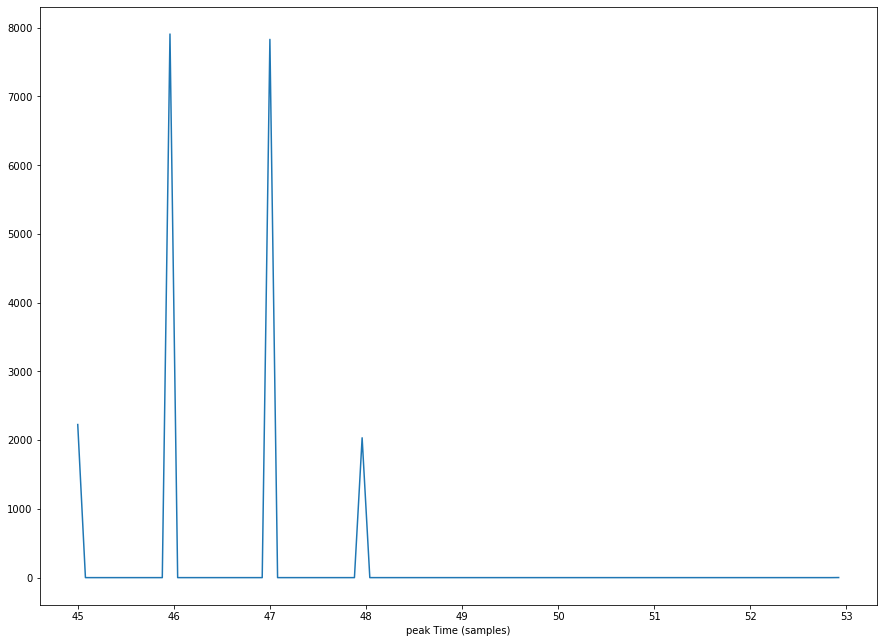

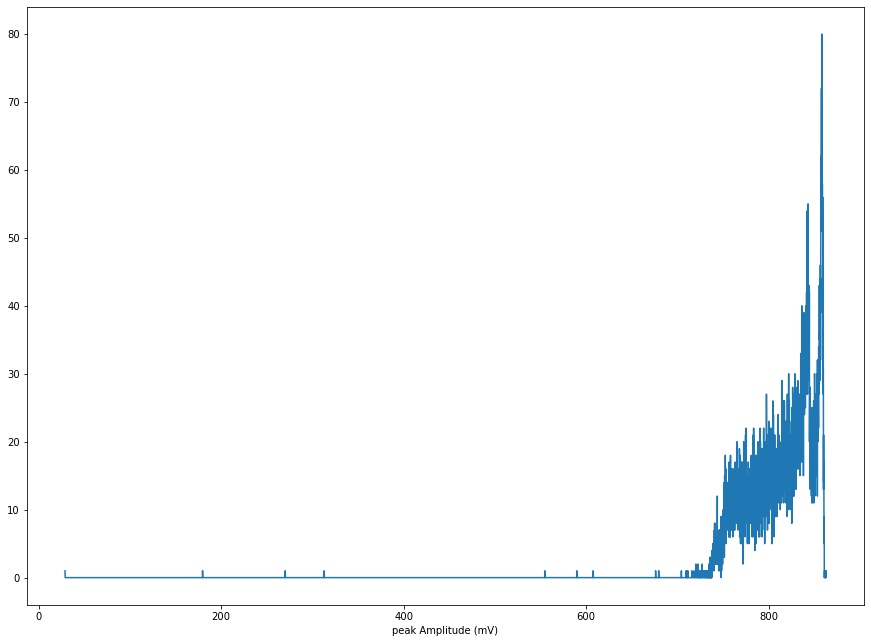

In [31]:
QHists = [tr.extRun(iG,30,10,30,qbins=50) for iG in fWaves]


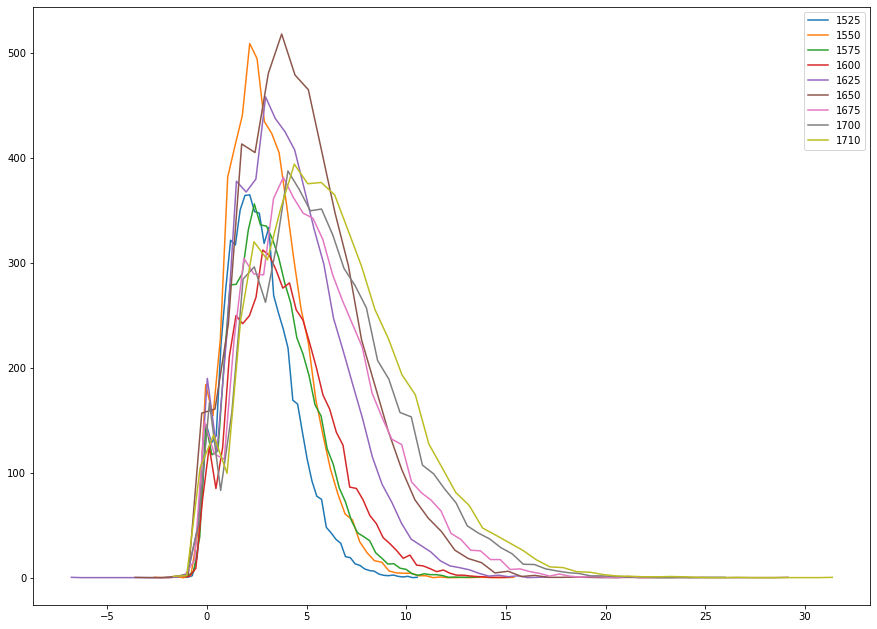

In [36]:
for i, data in enumerate(QHists):
    plt.plot(data[1], data[0], label=Gains[i])
plt.legend()

In [71]:
maxes = np.array([QHists[iG][1][np.argmax(QHists[iG][0])] for iG in range(len(Gains))])

intials = [[2, maxes[0], 0.5],
           []]

fits = []; tmps = []
for i, data in enumerate(QHists):
    fit, tmp = tr.fitQ(data, [1,400,1])
    fits.append(fit)
    tmps.append(tmp)
fits

[array([  2.4094804 , 362.44903266,   2.28488237]),
 array([  2.71966513, 483.55945492,   2.54730222]),
 array([  2.99709044, 339.21487193,   2.84592909]),
 array([  3.54850444, 298.43308592,   3.29255392]),
 array([  3.80415443, 440.53063331,   3.54423642]),
 array([  4.28068548, 502.5626858 ,   3.92972814]),
 array([  4.71848748, 360.45922168,   4.42028262]),
 array([  5.30271476, 359.2169804 ,   4.89022125]),
 array([  5.58255036, 383.49797371,   5.09598119])]

In [86]:
means = np.array([val[0] for val in fits])
errors = np.array([np.sqrt(np.diag(val))[0] for val in tmps])
errors
Gcurve = means

In [87]:
#Gcurve = np.array([QHists[iG][1][np.argmax(QHists[iG][0])] for iG in range(len(Gains))])

Text(0, 0.5, 'Q [pC]')

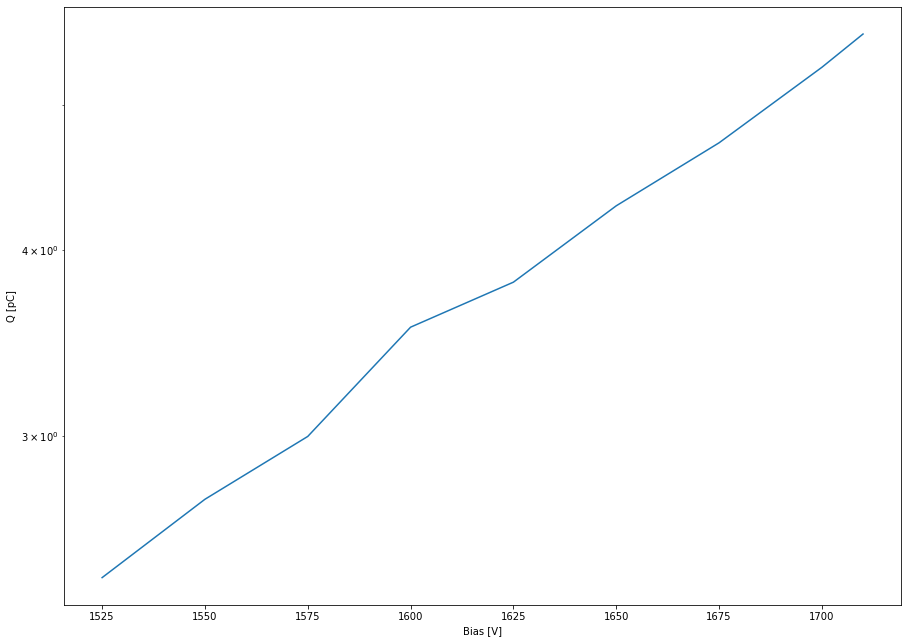

In [88]:
plt.plot(Gains,Gcurve)
plt.yscale('log')
#plt.xlim(-2,10)
plt.xlabel('Bias [V]')
plt.ylabel('Q [pC]')

In [89]:
QScale =1.6022e-7* Gcurve[-1]/SPE1710
QScale,SPE1710/1.6022e-7

(2.9814540621016996e-07, 18724254.148820765)

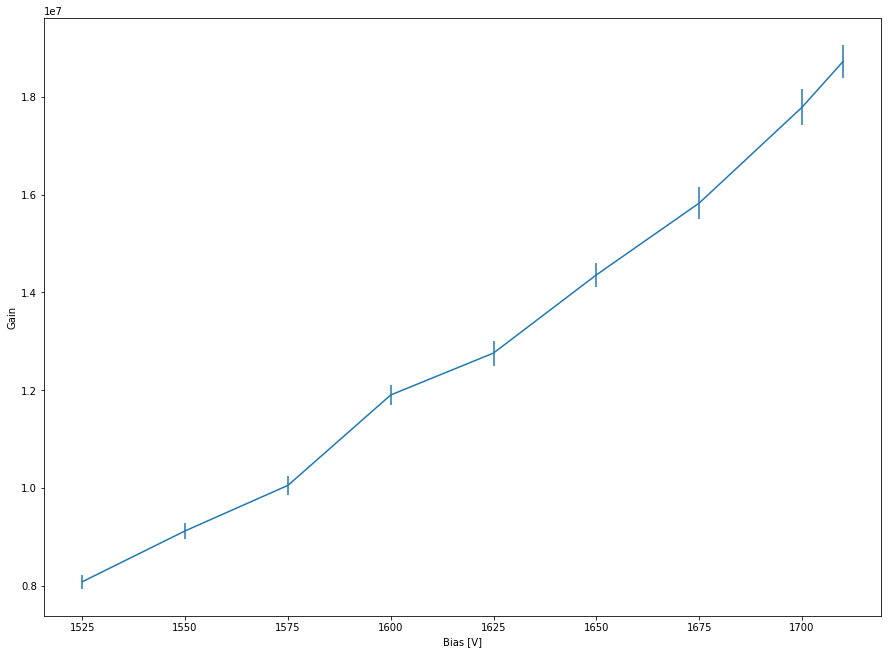

In [90]:
const = QScale
plt.errorbar(Gains,Gcurve/const , yerr=errors/const)
#plt.yscale('log')
#plt.xlim(-2,10)
plt.xlabel('Bias [V]')
plt.ylabel('Gain')
plt.savefig("GainCurve.png")

In [95]:
def fit_gain_curve(v, v0, gamma):
    q = ( v / v0 ) ** gamma
    return q

from scipy.optimize import curve_fit
fit, tmp = curve_fit(fit_gain_curve, Gains, Gcurve/const, p0 = [1560,10], sigma=errors/const)    

/home/lzer/miniconda3/envs/DDC10Ana/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


In [ ]:
plt.errorbar(Gains,Gcurve/const , yerr=errors/const)


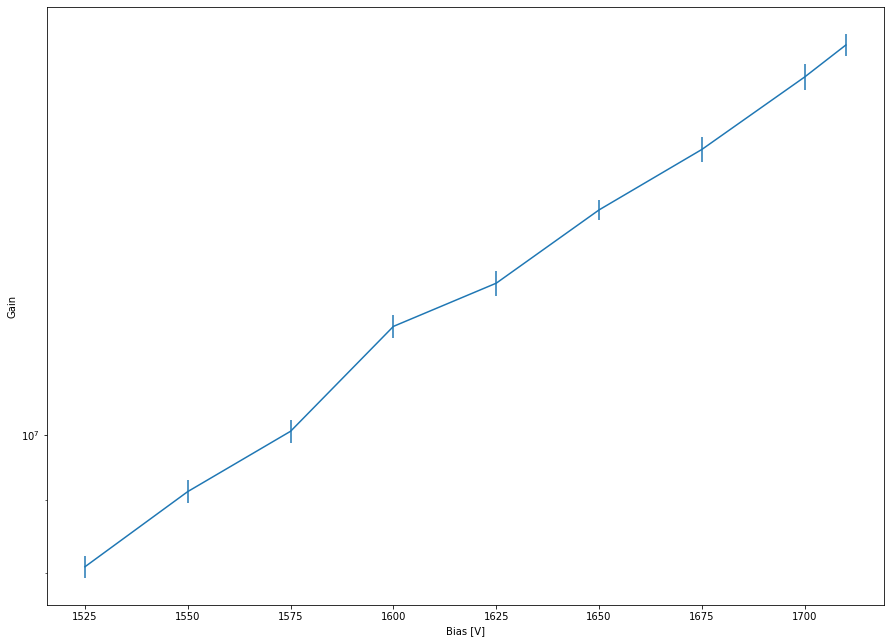

In [96]:
const = QScale
plt.errorbar(Gains,Gcurve/const , yerr=errors/const)
plt.yscale('log')
#plt.xlim(-2,10)
plt.xlabel('Bias [V]')
plt.ylabel('Gain')
plt.savefig("GainCurve.png")

In [102]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(Gains,np.log(Gcurve/const))
slope, intercept

(0.0044854497205178995, 9.074709805930453)

In [114]:
x = (np.log(10**7) - intercept) / slope
x

1570.2741717980116

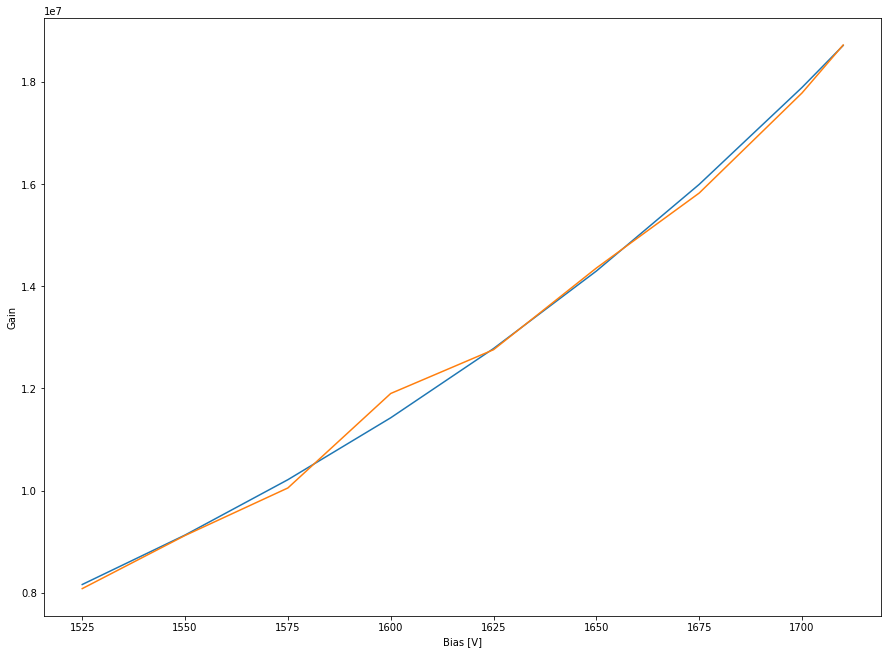

In [115]:
points = slope * np.array(Gains) + intercept

const = QScale
plt.errorbar(Gains,np.exp(points))
plt.errorbar(Gains,Gcurve/const)
plt.plot()
#plt.yscale('log')
#plt.xlim(-2,10)
plt.xlabel('Bias [V]')
plt.ylabel('Gain')
plt.savefig("GainCurve.png")

# 